## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
#asos_snotel_UA_df['LXV_WindSpeed_m/s']

#asos_snotel_UA_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

asos_snotel_UA_df.astype('float16')
pd.set_option('display.expand_frame_repr', True)


print(asos_snotel_UA_df.keys())




#delete empty columns as they mess up loops
#del asos_snotel_UA_df['CMtn_6hr_Precipitation_mm']            #empty column


Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc',
       'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts',
       'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc',
       'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts'],
      dtype='object', length=163)


It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

***
# OLS Analysis of meteorological variables and snowfall (Training Dataset: 2008-2017 only)

**We will first utilize just the Copper Mountain surface level variables and run the model explicitly to generate statistics.  This will give snowfall predictive capability of individual meteorological variables (Dewpoint, SNOTEL Temperature, Temperature, Wind Speed, Cloud Cover, Wind Direction, 6hr Pressure change, and Pressure) using an OLS model and the 2008-2017 training dataset. The resulting values will also be used to verify some code which performs same analysis, but with a loop.  This code will then be fed all upper air and surface level variables to determine best combination of variables in the OLS model.**


In [3]:
#Import statsmodel

import statsmodels.api as sm
#import statsmodel
from statsmodels.formula.api import ols

### Single Variable OLS (CMtn Surface Variables)


In [4]:


OLS_CMtn_Dewpoint = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_Dewpoint_degC',asos_snotel_UA_df['2009':'2017']).fit()
OLS_CMtnSNTL_Temp = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtnSNTL_Temp_degC',asos_snotel_UA_df['2009':'2017']).fit()
OLS_CMtn_Temperature = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_Temperature_degC',asos_snotel_UA_df['2009':'2017']).fit()
OLS_CMtn_WindSpeed = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_WindSpeed_mps',asos_snotel_UA_df['2009':'2017']).fit()
OLS_CMtn_CloudCover = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_CloudCover_oktas', asos_snotel_UA_df['2009':'2017']).fit()
OLS_CMtn_WindDirection = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ CMtn_WindDirection_deg', asos_snotel_UA_df['2009':'2017']).fit()
OLS_LXV_12hr_delta_Pressure = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ LXV_12hr_delta_Pressure_hp', asos_snotel_UA_df['2009':'2017']).fit()
OLS_LXV_Pressure = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~ LXV_Pressure_hp', asos_snotel_UA_df['2009':'2017']).fit()


print(OLS_CMtn_Dewpoint.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtnSNTL_Temp.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_Temperature.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_WindSpeed.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_CloudCover.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_CMtn_WindDirection.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_LXV_12hr_delta_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")
print(OLS_LXV_Pressure.summary())
print("\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")



#['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
#       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
#       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
#       'LXV_Temperature_degC', 'LXV_Dewpoint_degC'


#print(a.rsquared)
#print(a.rsquared_adj)
#print(a.rsquared_adj)
#print(a.fvalue)
#print(a.f_pvalue)
#print(a.pvalues)
print(OLS_CMtn_Dewpoint.params)
#qq=sm.qqplot(a.resid, line='r')



                                      OLS Regression Results                                     
Dep. Variable:     CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in   R-squared:                       0.016
Model:                                               OLS   Adj. R-squared:                  0.011
Method:                                    Least Squares   F-statistic:                     3.012
Date:                                   Wed, 06 Feb 2019   Prob (F-statistic):             0.0843
Time:                                           08:58:03   Log-Likelihood:                -416.54
No. Observations:                                    189   AIC:                             837.1
Df Residuals:                                        187   BIC:                             843.6
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

#### Single Variable Summary
**Adjusted R:**  
OLS_CMtn_Dewpoint: 0.007  
OLS_CMtnSNTL_Temp:  -0.002 
OLS_CMtn_Temperature: -0.005  
OLS_CMtn_WindSpeed:  0.017  
OLS_CMtn_CloudCover:  0.000  
OLS_CMtn_WindDirection:  -0.004  
OLS_LXV_6hr_delta_Pressure:   0.004  
OLS_LXV_Pressure:    -0.003  

**Prob (F-statistic):**  
OLS_CMtn_Dewpoint: 0.139  
OLS_CMtnSNTL_Temp: 0.483  
OLS_CMtn_Temperature:  0.708  
OLS_CMtn_WindSpeed:  0.0466  
OLS_CMtn_CloudCover: 0.316 
OLS_CMtn_WindDirection:   0.614  
OLS_LXV_6hr_delta_Pressure:  0.155  
OLS_LXV_Pressure:   0.550 
  
From this, we can glean that Dewpoint alone likely has the best fit as the adjusted R squared is the highest.  The F statistics such signficant correlations (at 5% confident interval) for only  Dewpoint and Pressure).

## Determine which columns to use in OLS model.   
### Only going to to keep those data columns which have a matching hour to at least 67% of the snowfall measurements

In [5]:
variables = ['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_CloudCover_oktas', 'LXV_12hr_delta_Pressure_hp', \
 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', \
 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', \
 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', \
 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', \
 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', \
 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', \
 'KGJT_850mb_height_m', 'KGJT_850mb_tmpc', 'KGJT_850mb_dwpc', 'KGJT_850mb_drct', 'KGJT_850mb_speed_kts', \
 'KGJT_d850_700_height_m', 'KGJT_d850_700_tmpc', 'KGJT_d850_700_dwpc', 'KGJT_d850_700_drct', 'KGJT_d850_700_speed_kts', \
 'KGJT_d850_500_height_m', 'KGJT_d850_500_tmpc', 'KGJT_d850_500_dwpc', 'KGJT_d850_500_drct', 'KGJT_d850_500_speed_kts', \
 'KGJT_d850_400_height_m', 'KGJT_d850_400_tmpc', 'KGJT_d850_400_dwpc', 'KGJT_d850_400_drct', 'KGJT_d850_400_speed_kts', \
 'KGJT_d850_300_height_m', 'KGJT_d850_300_tmpc', 'KGJT_d850_300_dwpc', 'KGJT_d850_300_drct', 'KGJT_d850_300_speed_kts', \
 'KGJT_d850_250_height_m', 'KGJT_d850_250_tmpc', 'KGJT_d850_250_dwpc', 'KGJT_d850_250_drct', 'KGJT_d850_250_speed_kts', \
 'KGJT_d850_200_height_m', 'KGJT_d850_200_tmpc', 'KGJT_d850_200_dwpc', 'KGJT_d850_200_drct', 'KGJT_d850_200_speed_kts',\
 'KGJT_d700_500_height_m', 'KGJT_d700_500_tmpc', 'KGJT_d700_500_dwpc', 'KGJT_d700_500_drct', 'KGJT_d700_500_speed_kts', \
 'KGJT_d700_400_height_m', 'KGJT_d700_400_tmpc', 'KGJT_d700_400_dwpc', 'KGJT_d700_400_drct', 'KGJT_d700_400_speed_kts', \
 'KGJT_d700_300_height_m', 'KGJT_d700_300_tmpc', 'KGJT_d700_300_dwpc', 'KGJT_d700_300_drct', 'KGJT_d700_300_speed_kts', \
 'KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', 'KGJT_d700_250_speed_kts', \
 'KGJT_d700_200_height_m', 'KGJT_d700_200_tmpc', 'KGJT_d700_200_dwpc', 'KGJT_d700_200_drct', 'KGJT_d700_200_speed_kts', \
 'KGJT_d500_400_height_m', 'KGJT_d500_400_tmpc', 'KGJT_d500_400_dwpc', 'KGJT_d500_400_drct', 'KGJT_d500_400_speed_kts', \
 'KGJT_d500_300_height_m', 'KGJT_d500_300_tmpc', 'KGJT_d500_300_dwpc', 'KGJT_d500_300_drct', 'KGJT_d500_300_speed_kts', \
 'KGJT_d500_250_height_m', 'KGJT_d500_250_tmpc', 'KGJT_d500_250_dwpc', 'KGJT_d500_250_drct', 'KGJT_d500_250_speed_kts', \
 'KGJT_d500_200_height_m', 'KGJT_d500_200_tmpc', 'KGJT_d500_200_dwpc', 'KGJT_d500_200_drct', 'KGJT_d500_200_speed_kts', \
 'KGJT_d400_300_height_m', 'KGJT_d400_300_tmpc', 'KGJT_d400_300_dwpc', 'KGJT_d400_300_drct', 'KGJT_d400_300_speed_kts', \
 'KGJT_d400_250_height_m', 'KGJT_d400_250_tmpc', 'KGJT_d400_250_dwpc', 'KGJT_d400_250_drct', 'KGJT_d400_250_speed_kts', \
 'KGJT_d400_200_height_m', 'KGJT_d400_200_tmpc', 'KGJT_d400_200_dwpc', 'KGJT_d400_200_drct', 'KGJT_d400_200_speed_kts', \
 'KGJT_d300_250_height_m', 'KGJT_d300_250_tmpc', 'KGJT_d300_250_dwpc', 'KGJT_d300_250_drct', 'KGJT_d300_250_speed_kts', \
 'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc', 'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts', \
 'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts']

good_vars = []
bad_vars = []
for var in variables:
    idx = np.isfinite(asos_snotel_UA_df['2009':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']) & np.isfinite(asos_snotel_UA_df['2009':'2017'][var])
    total_poss = len(asos_snotel_UA_df['2009':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df['2009':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=0])
    total_avail =len(asos_snotel_UA_df['2009':'2017'][idx])
    if total_avail/total_poss >= 0.67: 
        good_vars.append(var)
    else:
        bad_vars.append(var)
        
print('Variables with >= 67% data match to snowfall: ')
print(good_vars)
print('Variables with < 67% data match to snowfall: ')
print(bad_vars)
    
    
    


Variables with >= 67% data match to snowfall: 
['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 'KGJT_d850_500_height_

### Now run OLS model with the chosen variables ##

In [6]:
from collections import OrderedDict

variables = good_vars
variables_org = variables
print(variables)

print('******')
adjRs = []
newRs = []
dup_var = []
max_vars = []
f_pvalues = []

while variables != []:
  #print(variables)
  for var in variables:
        
    #print(variables)
    max_var = max(variables, key = lambda v: ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + v, asos_snotel_UA_df['2009':'2017']).fit().rsquared_adj)    #this finds OLS model run with highest adj R squared
    OLS = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + max_var, asos_snotel_UA_df['2009':'2017']).fit()
    print(max_var)
    print(OLS.rsquared_adj)
    
    #Create lists of statistics for each combination of variables modeld
    adjRs.append(OLS.rsquared_adj)
    f_pvalues.append(OLS.f_pvalue)
    max_vars.append(max_var)

    add_max_var = '+ '+ max_var
    
    variables = [s + add_max_var for s in variables_org]
    
    #The above for loop naturally will create a duplicate variable, which should be removed
    for v in variables_org: 
      dup_var = []
      dup_var = [var for var in variables if var.count(v)>1]
      if dup_var!=[]:
            for dup in dup_var: variables.remove(dup)

#combine the modeled variable sequences with respective stats  
stats = list(zip(adjRs, f_pvalues))    # create list of tuples
dictionary = OrderedDict(zip(max_vars, stats))
#dictionary_adjRs = OrderedDict(zip(max_vars, f_pvalues))
print(adjRs)
print(max_vars)
print(f_pvalues)
print(dictionary)



['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 'KGJT_d850_500_height_m', 'KGJT_d850_400_height_m', 'KGJT_d850_300_he

KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts
0.15669556544814145
KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_

CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts
0.14601281342672023
KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_hei

KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts
0.1345075494658664
KGJT_d700_500_dwpc

KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d50

KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+

KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KG

KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m

KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_

KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_t

KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_30

KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_

KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500

KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts

KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_s

KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d5

KGJT_d700_200_dwpc+ KGJT_300mb_dwpc+ KGJT_d300_250_dwpc+ KGJT_d400_300_dwpc+ KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ 

KGJT_200mb_dwpc+ KGJT_d500_200_dwpc+ KGJT_d300_200_dwpc+ KGJT_d250_200_dwpc+ KGJT_d700_200_dwpc+ KGJT_300mb_dwpc+ KGJT_d300_250_dwpc+ KGJT_d400_300_dwpc+ KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_he

CMtn_WindSpeed_mps+ CMtn_Dewpoint_degC+ CMtn_Temperature_degC+ KGJT_d400_200_dwpc+ KGJT_200mb_dwpc+ KGJT_d500_200_dwpc+ KGJT_d300_200_dwpc+ KGJT_d250_200_dwpc+ KGJT_d700_200_dwpc+ KGJT_300mb_dwpc+ KGJT_d300_250_dwpc+ KGJT_d400_300_dwpc+ KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_

**Create plot of adjusted R squared**

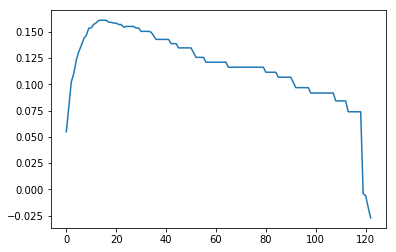

In [7]:
plt.plot(adjRs)

**Create plot of probabilities associated with the F statistic**

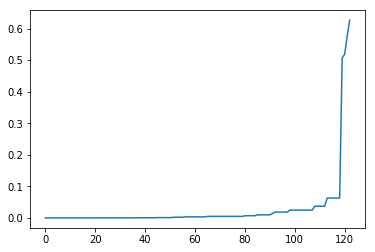

In [8]:
plt.plot(f_pvalues)

**Print adjusted R and F stat probabilities in order**

In [9]:


for c in dictionary:
    #print(str(dictionary.keys().index(c))+"{country}: {capital}".format(country=c, capital=dictionary[c])+"\n")
        print(str(list(dictionary.keys()).index(c))+ " {key} \n Adjusted R: {adjR}  Fstat(prob): {f_pvalue}".format(key=c, adjR=dictionary[c][0], f_pvalue = dictionary[c][1])+"\n")
        OLS = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + c, asos_snotel_UA_df['2009':'2017']).fit()



0 KGJT_500mb_speed_kts 
 Adjusted R: 0.05486146297448713  Fstat(prob): 9.738181852714099e-05

1 LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.07813183862144513  Fstat(prob): 4.9993317391177157e-05

2 KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.10211317278134102  Fstat(prob): 7.419967289383048e-06

3 KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.11014814429275854  Fstat(prob): 6.420457355887517e-06

4 KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.12284894017100745  Fstat(prob): 3.6129657744427527e-06

5 KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.13090864266115987  Fstat(prob): 2.7659900907470993e-06

6 KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_s

26 KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.15490027170594634  Fstat(prob): 5.768801361284192e-05

27 KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dw

38 KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 
 Adjusted R: 0.14257043931880053  Fstat(prob): 0.00040561772313157035

39 KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+


48 KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_deg

57 KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height_m+ KGJT_d300_250_height_m+ KGJT_d700_250_drct+ KGJT_300mb_speed_kts+ KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d

65 KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KGJT_d300_200_height_m+ KGJT_250mb_tmpc+ KGJT_500mb_dwpc+ KGJT_400mb_dwpc+ KGJT_d700_400_height_m+ KGJT_d700_500_height_m+ KGJT_d850_250_height

71 KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_height_m+ KGJT_850mb_height_m+ KGJT_d700_400_speed_kts+ KGJT_d400_200_speed_kts+ KGJT_d850_200_height_m+ KGJT_d250_200_height_m+ KGJT_200mb_tmpc+ KG

77 KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500_250_tmpc+ CMtnSNTL_Temp_degC+ LXV_Pressure_hp+ KGJT_300mb_height_m+ KGJT_250mb_height_m+ KGJT_200mb_heig

82 KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d700_300_drct+ KGJT_d500_200_tmpc+ KGJT_d700_200_tmpc+ KGJT_700mb_tmpc+ KGJT_d700_250_tmpc+ KGJT_500mb_tmpc+ KGJT_d500


88 KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_250_dwpc+ KGJT_700mb_dwpc+ KGJT_d700_500_dwpc+ KGJT_d400_250_dwpc+ KGJT_d300_250_drct+ KGJT_300mb_drct+ KGJT_d70


93 KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_500_drct+ KGJT_d500_250_drct+ LXV_WindSpeed_mps+ KGJT_d700_400_dwpc+ KGJT_250mb_dwpc+ KGJT_d500_

97 KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed_kts+ KGJT_700mb_speed_kts+ KGJT_d500_300_drct+ KGJT_500mb_drct+ KGJT_d700_

101 KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_500_speed_kts+ KGJT_d700_300_speed_kts+ KGJT_200mb_speed_kts+ KGJT_d400_300_speed

105 KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJT_d500_400_speed_kts+ KGJT_d500_200_speed_kts+ KGJT_400mb_speed_kts+ KGJT_d700_5

109 KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height_m+ KGJT_d500_200_height_m+ KGJT_700mb_height_m+ KGJT_d300_200_speed_kts+ KGJ

113 KGJT_d700_200_dwpc+ KGJT_300mb_dwpc+ KGJT_d300_250_dwpc+ KGJT_d400_300_dwpc+ KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_700_height_m+ KGJT_d500_250_height_m+ KGJT_d700_200_height_m+ KGJT_500mb_height

117 KGJT_200mb_dwpc+ KGJT_d500_200_dwpc+ KGJT_d300_200_dwpc+ KGJT_d250_200_dwpc+ KGJT_d700_200_dwpc+ KGJT_300mb_dwpc+ KGJT_d300_250_dwpc+ KGJT_d400_300_dwpc+ KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ KGJT_d500_300_height_m+ KGJT_d850_500_height_m+ KGJT_d400_250_height_m+ KGJT_d850_70

121 CMtn_WindSpeed_mps+ CMtn_Dewpoint_degC+ CMtn_Temperature_degC+ KGJT_d400_200_dwpc+ KGJT_200mb_dwpc+ KGJT_d500_200_dwpc+ KGJT_d300_200_dwpc+ KGJT_d250_200_dwpc+ KGJT_d700_200_dwpc+ KGJT_300mb_dwpc+ KGJT_d300_250_dwpc+ KGJT_d400_300_dwpc+ KGJT_d500_300_dwpc+ KGJT_d700_300_dwpc+ KGJT_d700_400_drct+ KGJT_d400_300_drct+ KGJT_d250_200_drct+ KGJT_d500_400_drct+ KGJT_d400_250_drct+ KGJT_d300_200_drct+ KGJT_200mb_drct+ KGJT_400mb_drct+ KGJT_d700_200_drct+ KGJT_d500_200_drct+ KGJT_250mb_speed_kts+ KGJT_d300_250_speed_kts+ KGJT_d250_200_speed_kts+ KGJT_d400_250_speed_kts+ KGJT_d700_250_speed_kts+ KGJT_d500_250_speed_kts+ LXV_Temperature_degC+ KGJT_d500_400_tmpc+ KGJT_d700_400_tmpc+ KGJT_400mb_tmpc+ KGJT_d400_200_tmpc+ KGJT_d400_300_tmpc+ KGJT_d400_250_tmpc+ KGJT_d700_300_tmpc+ KGJT_300mb_tmpc+ KGJT_d300_250_tmpc+ KGJT_d300_200_tmpc+ KGJT_d500_300_tmpc+ KGJT_d400_200_height_m+ KGJT_400mb_height_m+ KGJT_d400_300_height_m+ KGJT_d850_400_height_m+ KGJT_d700_250_height_m+ KGJT_d700_300_height_m+ K

**Find max adj R and obtain OLS summary**

In [10]:
 # Just use 'min' instead of 'max' for minimum.
print("Print maximum:")
maximum = max(dictionary, key=dictionary.get) 
print(maximum)

Print maximum:
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts


In [11]:
maximum_all_str = max(dictionary, key=dictionary.get) 
print(maximum_all_str)

maxOLS_all = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + maximum_all_str , asos_snotel_UA_df['2009':'2017']).fit() 
print(maxOLS_all.summary())


KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts
                                      OLS Regression Results                                     
Dep. Variable:     CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in   R-squared:                       0.220
Model:                                               OLS   Adj. R-squared:                  0.161
Method:                                    Least Squares   F-statistic:                     3.733
Date:                                   Wed, 06 Feb 2019   Prob (F-statistic):           8.55e-06
Time:                                           09:10:49   Log-Likelihood:                -463.40
No. Observations:                                    215   AIC:                          

**Print QQ plot**

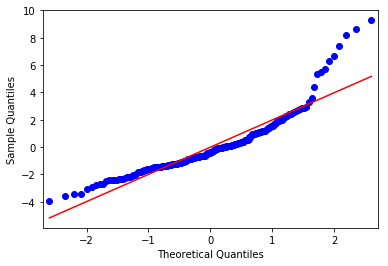

In [12]:
qq2=sm.qqplot(maxOLS_all.resid, line='r')

**There are a few variables with P|t| values which are high, indicative of high randomness. Let's test different P|t| thresholds for which to remove variables, rerun and model for each set of variables, and see what threshold might glean best results**

In [13]:
rsq_adj = 0
thresh = 0

goodp_str = ""
highp_var = []

maximum_all_str = max(dictionary, key=dictionary.get)    #this is the string of variables found in previous OLS run associated with mad adjusted R squared.
print(maximum_all_str)


for test_thresh in range(1, 100):   #loop through different P|t| thresholds ranging from 1 to 100.  Note floats are not allowed here 
  print(test_thresh)
  highp_var = [var for var in maxOLS_all.pvalues.keys() if maxOLS_all.pvalues[var]>=test_thresh*0.01]  #check P|t| for each variable against threshold and store in list
  
  testgoodp_str = maximum_all_str   #reset testgoodp_str 
    
  for var in highp_var:
    testgoodp_str = testgoodp_str.replace("+ " + var, "")   #  
     

 

  maxOLS_testgoodp = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + testgoodp_str, asos_snotel_UA_df['2009':'2017']).fit()
  print(testgoodp_str, maxOLS_testgoodp.rsquared_adj, test_thresh*0.01)
  #print(maxOLS_testgoodp.rsquared_adj)
  if maxOLS_testgoodp.rsquared_adj > rsq_adj:
      rsq_adj = maxOLS_testgoodp.rsquared_adj
      print(maxOLS_testgoodp.rsquared_adj, test_thresh*0.01)
      goodp_str = testgoodp_str
      thresh = test_thresh*0.01

    
print("\n best threshold is:" + str(thresh))
maxOLS_goodp = ols('CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in ~' + goodp_str, asos_snotel_UA_df['2009':'2017']).fit() 
print(maxOLS_goodp.summary())


KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts
1
KGJT_d850_300_height_m+ KGJT_500mb_speed_kts 0.055964674459575536 0.01
0.055964674459575536 0.01
2
KGJT_d850_300_height_m+ KGJT_d250_200_tmpc+ KGJT_500mb_speed_kts 0.06731172008394615 0.02
0.06731172008394615 0.02
3
KGJT_d850_300_height_m+ KGJT_d400_200_drct+ KGJT_700mb_drct+ KGJT_d250_200_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.09125124473921287 0.03
0.09125124473921287 0.03
4
KGJT_d850_300_height_m+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ KGJT_700mb_drct+ KGJT_d250_200_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.08854905082797127 0.04
5
KGJT_d850_300_height_m+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ KGJT_700mb_drct+ KGJT_d250_200_tmpc+ LXV_Dew

KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.16077301518757714 0.36
37
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.16077301518757714 0.37
38
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_de

KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.16077301518757714 0.61
62
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.16077301518757714 0.62
63
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_de

KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.16077301518757714 0.86
87
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_degC+ KGJT_500mb_speed_kts 0.16077301518757714 0.87
88
KGJT_d850_300_height_m+ LXV_12hr_delta_Pressure_hp+ KGJT_d500_400_dwpc+ KGJT_250mb_drct+ KGJT_d700_200_speed_kts+ KGJT_d500_300_speed_kts+ KGJT_d400_200_drct+ LXV_WindDirection_deg+ KGJT_700mb_drct+ KGJT_d500_400_height_m+ KGJT_d700_250_dwpc+ KGJT_d250_200_tmpc+ KGJT_d700_500_tmpc+ LXV_Dewpoint_de

**No improvement to P|t| could be made**

## Try fit parameters with test dataset (2016 and 2017 data)

In [14]:
good_vars = []
bad_vars = []
sd_missings =[]
for var in variables:
    idx = np.isfinite(asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']) & np.isfinite(asos_snotel_UA_df['2006':'2008'][var])
    total_poss = len(asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=0])
    total_avail =len(asos_snotel_UA_df['2006':'2008'][idx])
    
    sd_missings.append(total_avail/total_poss)
    if total_avail/total_poss >= 0.67: 
        good_vars.append(var)
    else:
        bad_vars.append(var)
        
print('Variables with >= 67% data match to snowfall: ')
print(good_vars)
print('Variables with < 67% data match to snowfall: ')
print(bad_vars)
    

from tabulate import tabulate

tbl = zip(variables,sd_missings)  
    
print(tabulate(tbl, headers=['Var',  '%Missing'], tablefmt='github'))


Variables with >= 67% data match to snowfall: 
[]
Variables with < 67% data match to snowfall: 
[]
| Var   | %Missing   |
|-------|------------|


82
75 75
82


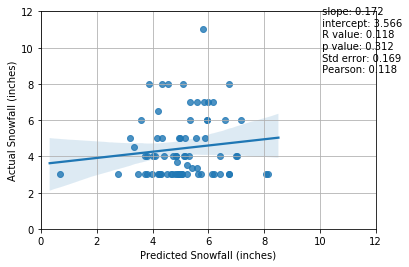

In [15]:

from scipy.stats import pearsonr, linregress
#print(asos_snotel_UA_df['2006':'2008'][asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=3].describe())

actual_snf = asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=3]
predict = maxOLS_goodp.predict(asos_snotel_UA_df['2006':'2008'][asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=3])
#print(actual_snf.describe())


idx = np.isfinite(predict) & np.isfinite(actual_snf) 
sns.regplot(predict[idx], actual_snf[idx])



slope1, intercept1, r_value1, p_value1, std_err1 = linregress(predict[idx], actual_snf[idx])
pearson1, pv = pearsonr(predict[idx], actual_snf[idx])
plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,3)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=10)

plt.xlabel('Predicted Snowfall (inches)')
plt.ylabel('Actual Snowfall (inches)')
plt.xlim([0,12])
plt.ylim([0,12])
plt.grid(True)
print(idx.count())
print(predict[idx].count(), actual_snf[idx].count())
print(asos_snotel_UA_df['2006':'2008']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].count())
#print(actual_snf.describe())
#print(predict.describe())

[5.55532279 4.16076099 4.82902489 4.94622051 5.34912277 4.01681917
 5.3219249  4.92072811 4.08475366 5.09872001 5.15808932 4.56782671
 4.93801876 5.35722283 5.81165359 5.24806722 7.15382659 3.98136922
 5.04650158 6.99093883 4.78710555 5.87364978 5.95740344 4.34149657
 5.9669752  3.73864481 4.84598977 3.46797168 4.98863721 3.59037058
 0.69017577 3.20016828 4.52128557 5.60790119 4.20486859 5.24774807
 4.22369515 4.70252248 2.74931234 4.30868592 3.7137338  5.13041376
 6.58449618 3.79225455 6.40293308 5.61884461 6.73159458 5.05676896
 6.72615272 4.87964957 4.66663794 7.01793163 5.42780028 4.88263804
 6.74177841 6.41440029 5.85667121 5.15228898 3.81682207 4.26740738
 4.74285389 4.96783851 5.97776292 3.34032725 4.33185321 6.16951474
 6.12606179 8.07512049 4.18302262 8.13398762 3.87985102 6.20793055
 4.40134017 5.72043415 5.61014   ]
[ 5.    5.    4.    5.    7.    4.    4.    3.    4.    8.    5.    8.
  3.    6.   11.    3.    6.    3.    3.    4.    3.    5.    6.    5.
  6.    4.    4.   

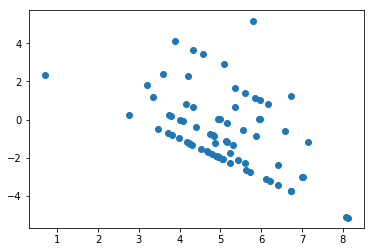

In [16]:
plt.scatter(predict[idx].values, actual_snf[idx].values-predict[idx].values)
print(predict[idx].values)
print(actual_snf[idx].values)
print(actual_snf[idx].values-predict[idx].values)

#print(type(predict))
#print(type(actual_snf))
#sns.regplot(predict[idx], actual_snf[idx]-predict[idx])
diff = actual_snf[idx].values-predict[idx].values
PercentSuccess1 = len([x for x in diff if abs(x)<=1])/len(diff)
PercentSuccess15 = len([x for x in diff if abs(x)<=1.5])/len(diff)
PercentSuccess2= len([x for x in diff if abs(x)<=2])/len(diff)
print(PercentSuccess1, PercentSuccess15, PercentSuccess2)

40.38899163638062


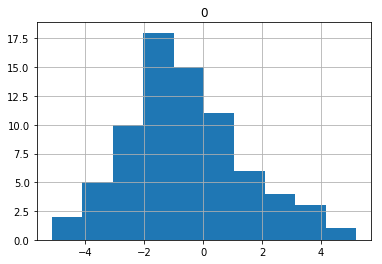

In [17]:
diff_df = pd.DataFrame(diff)
hist = diff_df.hist()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict[idx].values, actual_snf[idx].values-predict[idx].values)
print(mse)